In [24]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
# Visualize the first 5 rows of the train and test datasets

df_train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
df_test.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [5]:
# Check for missing values in the train and test data

df_train.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [6]:
df_test.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [7]:
# Examine the data types of each column in the train and test data

df_train.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [8]:
df_test.dtypes

id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
dtype: object

In [9]:
# See how many unique values for each column are in the train and test data

df_train.nunique()

id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

In [10]:
df_test.nunique()

id         276
gravity     27
ph          62
osmo        75
cond        58
urea        71
calc        74
dtype: int64

In [17]:
# See what the unique values are for gravity in train data

np.sort(df_train["gravity"].unique())

array([1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012, 1.013,
       1.014, 1.015, 1.017, 1.018, 1.019, 1.02 , 1.021, 1.022, 1.023,
       1.024, 1.025, 1.026, 1.027, 1.028, 1.029, 1.031, 1.033, 1.034,
       1.04 ])

In [18]:
np.sort(df_test["gravity"].unique())

array([1.005, 1.006, 1.008, 1.009, 1.01 , 1.011, 1.012, 1.013, 1.014,
       1.015, 1.016, 1.017, 1.018, 1.019, 1.02 , 1.021, 1.022, 1.023,
       1.024, 1.025, 1.026, 1.027, 1.028, 1.029, 1.031, 1.033, 1.034])

##THOUGHTS AND OBSERVATIONS

1. There are no blank cells in the data
2. "gravity" has few unique values so can possibily be considered categorical. However, there is a value of this column that exists in the test data that is not in the train data "1.016"
3. It might be possible to treat pH as a categorical variable by rounding the values so the values will be int between 1 and 14 (inclusive)
3b. Could even group the values into 3 categories of basic, neutral or acidic
4. Combining the train and test set then One-Hot encoding the combined dataset then splitting back to train and test

In [19]:
# Analyse the summary statistics in train and test data

df_train.describe(percentiles=[0.01, 0.99])

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
1%,4.130000,1.006130,4.821700,225.000000,5.100000,64.000000,0.183000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
99%,408.870000,1.034000,7.900000,1236.000000,38.000000,620.000000,13.000000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [20]:
df_test.describe(percentiles=[0.01, 0.99])

,id,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,551.500000,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,79.818544,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,414.000000,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
1%,416.750000,1.005750,4.907500,225.000000,6.900000,64.000000,0.580000
50%,551.500000,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
99%,686.250000,1.034000,7.920000,1236.000000,36.425000,620.000000,13.000000
max,689.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


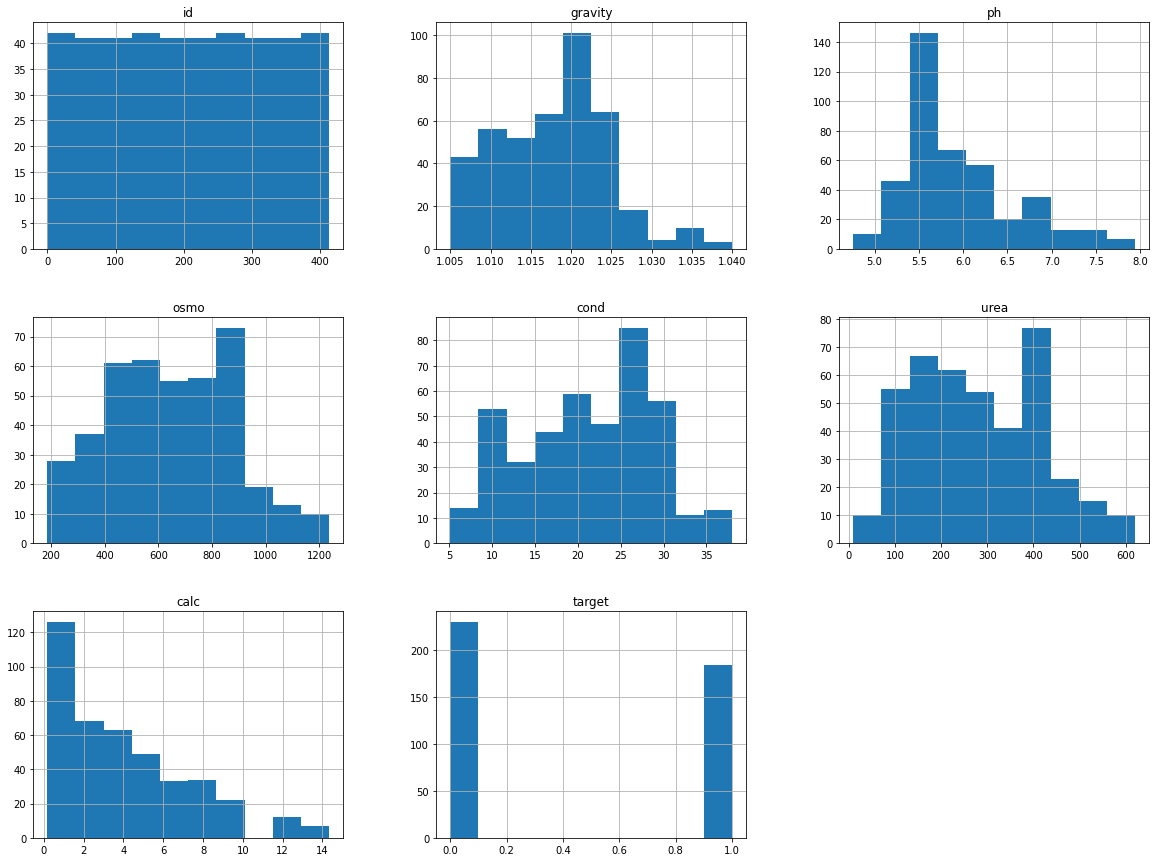

In [22]:
# Create histogram of the train and test datasets

df_train.hist(figsize=(20, 15))
plt.show()

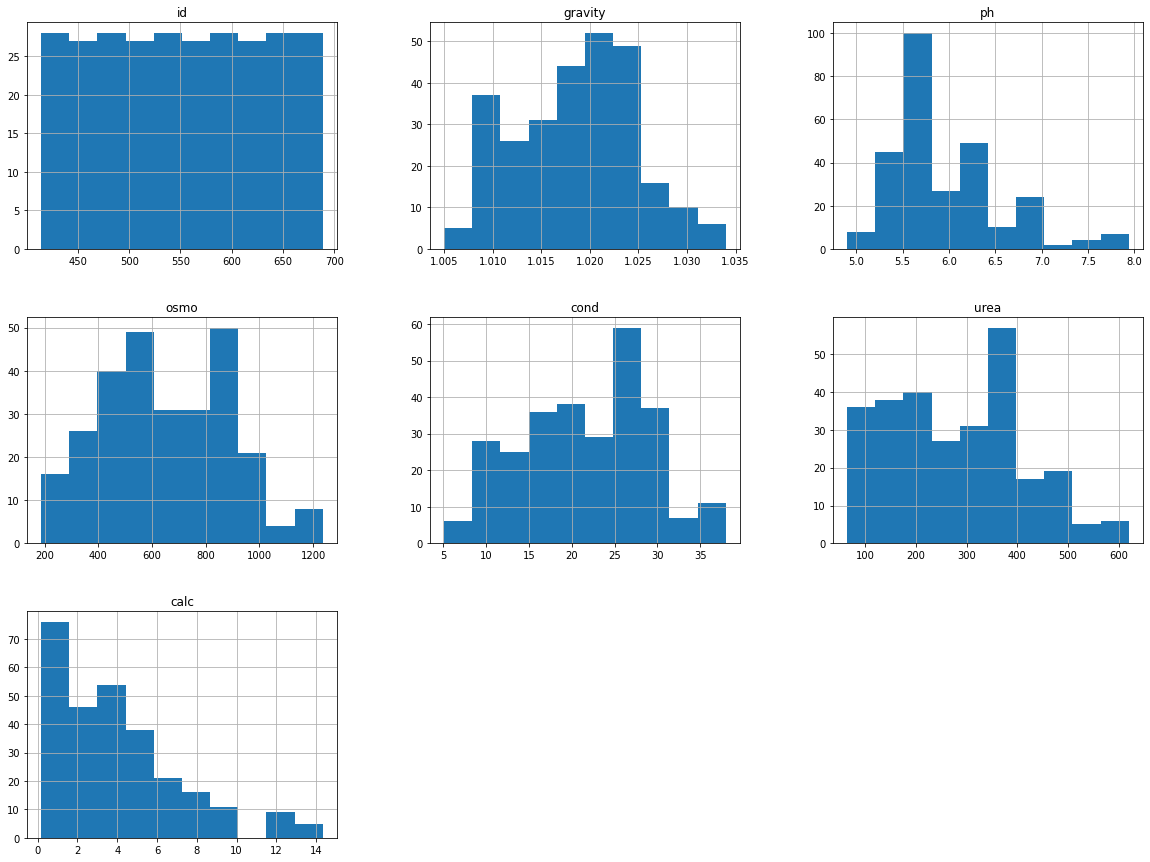

In [23]:
df_test.hist(figsize=(20, 15))
plt.show()

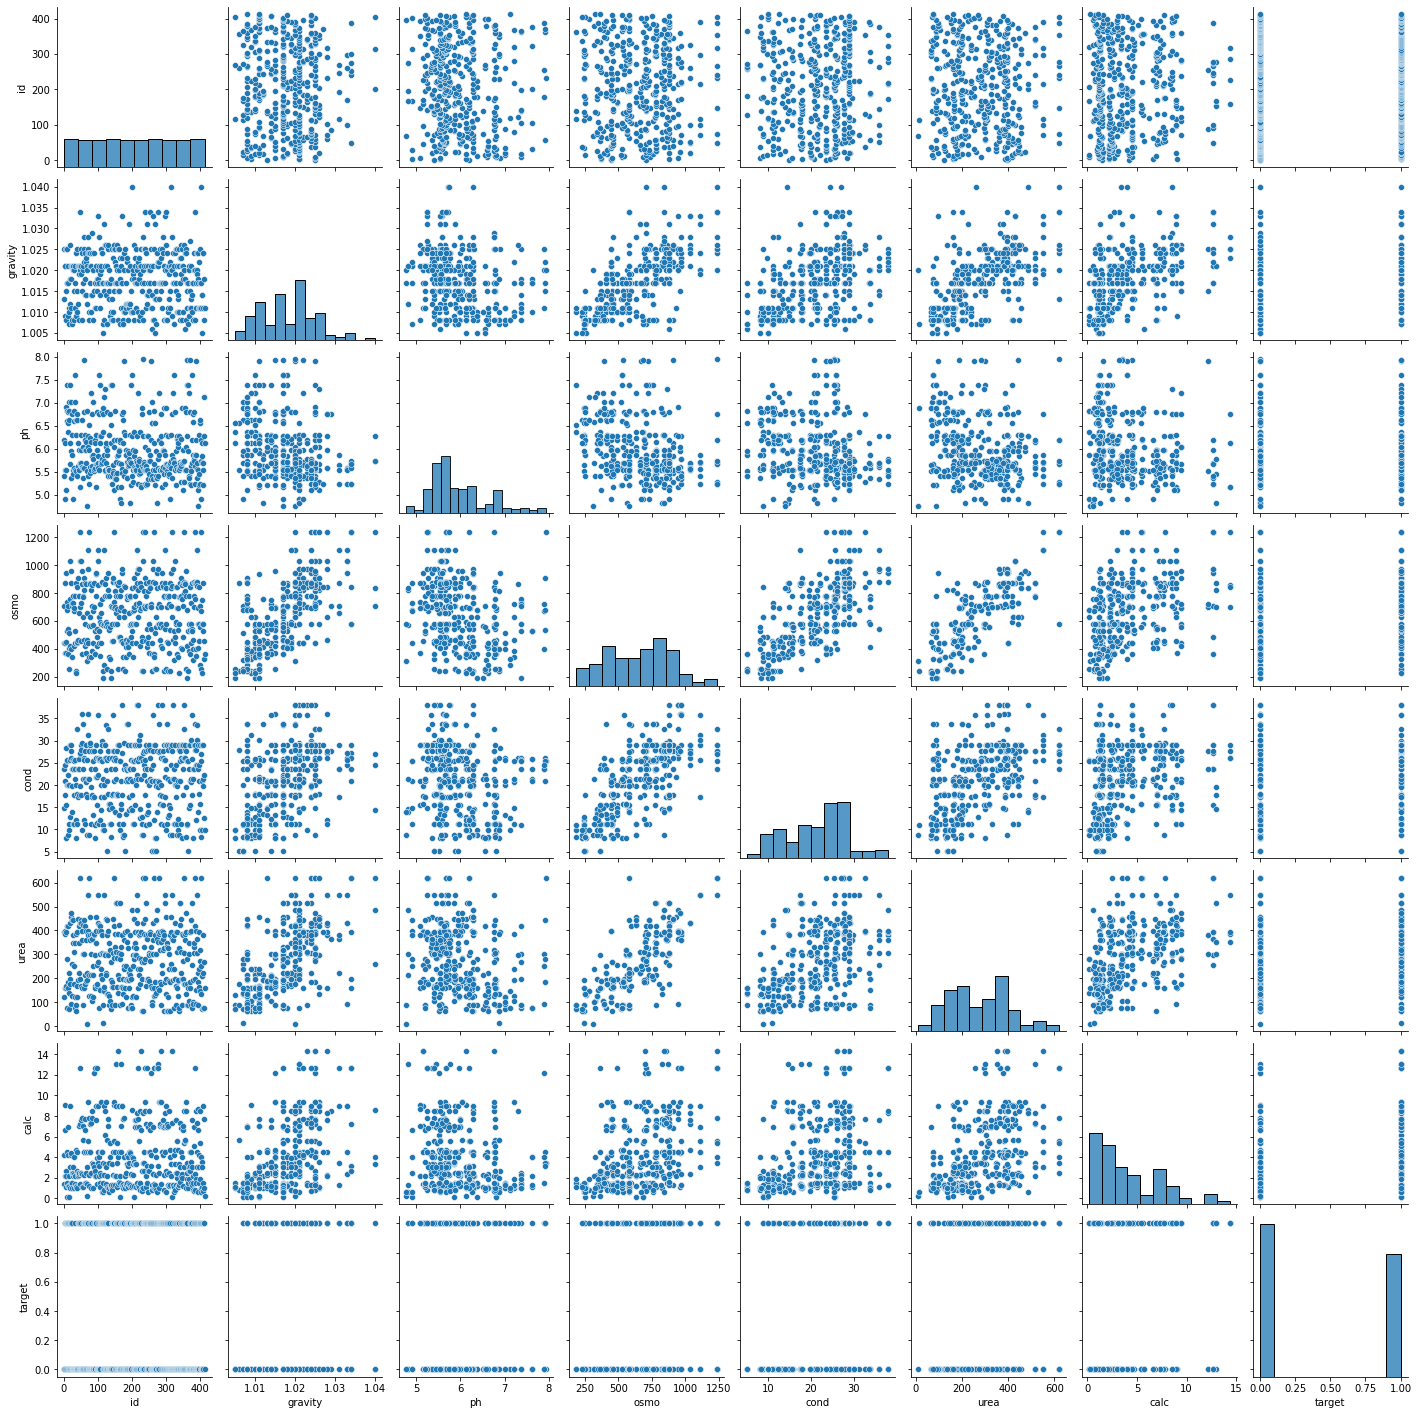

In [25]:
# Pairplot of the entire dataset to observe the correlation between features and also the target variables

sns.pairplot(df_train)
plt.show()